In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [4]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the date distribuited?

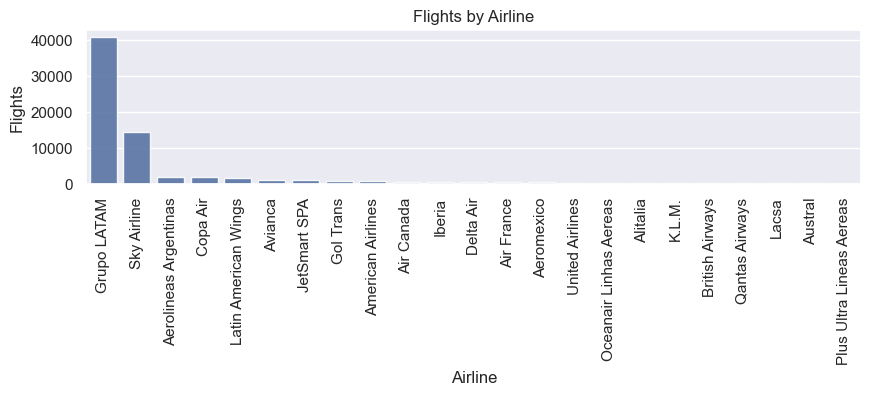

In [8]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(flights_by_airline, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

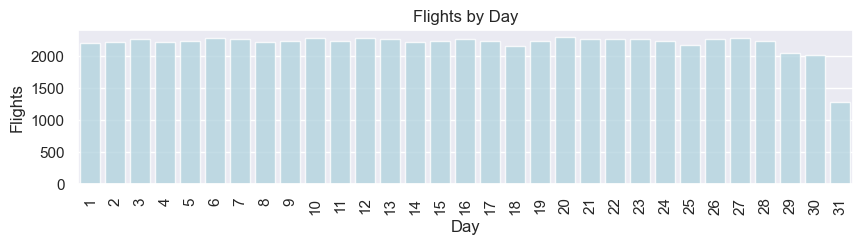

In [9]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(flights_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

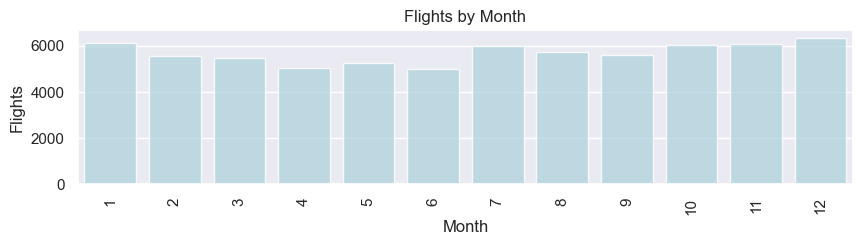

In [10]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(flights_by_month, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

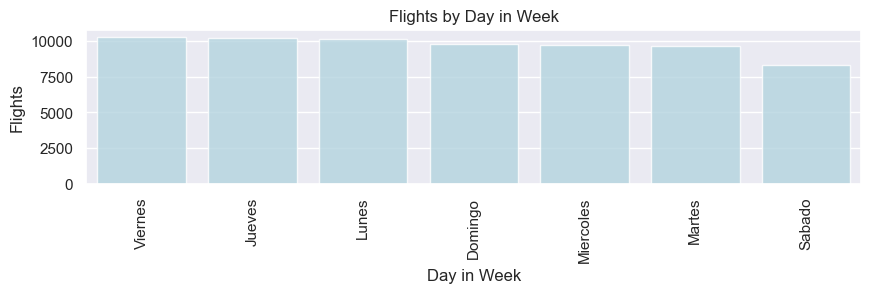

In [12]:
flights_by_day_in_week = data['DIANOM'].value_counts()

plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(flights_by_day_in_week, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

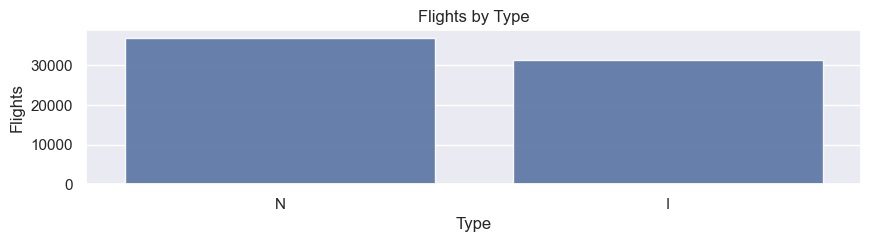

In [13]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(flights_by_type, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

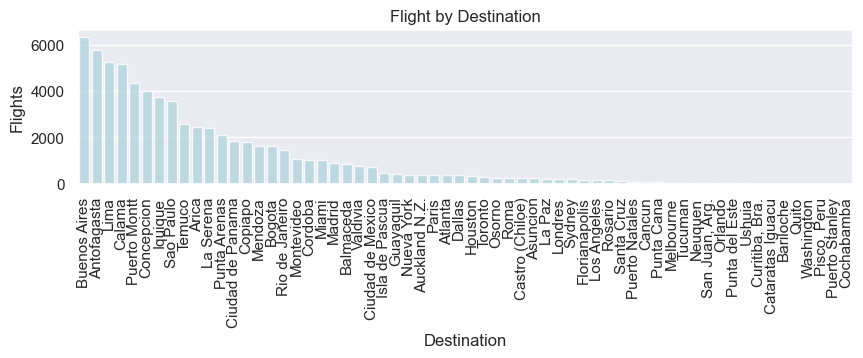

In [14]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(flight_by_destination, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [15]:
from datetime import datetime

def get_period_day(date):
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    evening_min = datetime.strptime("19:00", '%H:%M').time()
    evening_max = datetime.strptime("23:59", '%H:%M').time()
    night_min = datetime.strptime("00:00", '%H:%M').time()
    night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time > morning_min and date_time < morning_max):
        return 'mañana'
    elif(date_time > afternoon_min and date_time < afternoon_max):
        return 'tarde'
    elif(
        (date_time > evening_min and date_time < evening_max) or
        (date_time > night_min and date_time < night_max)
    ):
        return 'noche'

In [16]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [17]:
from datetime import datetime

def is_high_season(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

In [18]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [19]:
def get_min_diff(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [20]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [21]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

In [22]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'period_day', 'high_season',
       'min_diff', 'delay'],
      dtype='object')

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [23]:
def get_rate_from_column(data, column):
    delays = {}
    for _, row in data.iterrows():
        if row['delay'] == 1:
            if row[column] not in delays:
                delays[row[column]] = 1
            else:
                delays[row[column]] += 1
    total = data[column].value_counts().to_dict()
    
    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(total / delays[name], 2)
        else:
            rates[name] = 0
            
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])

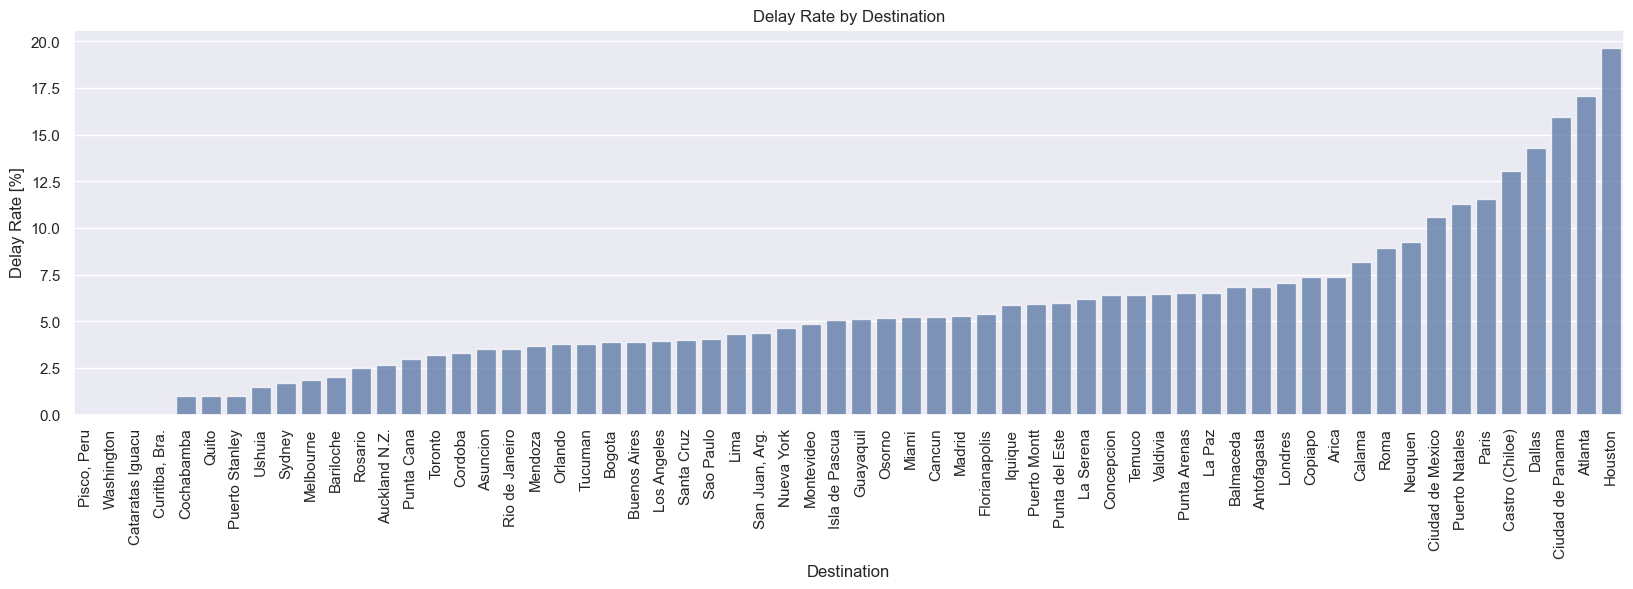

In [39]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate = destination_rate.sort_values(by="Tasa (%)").reset_index()

plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(destination_rate, x="index", y="Tasa (%)",  alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


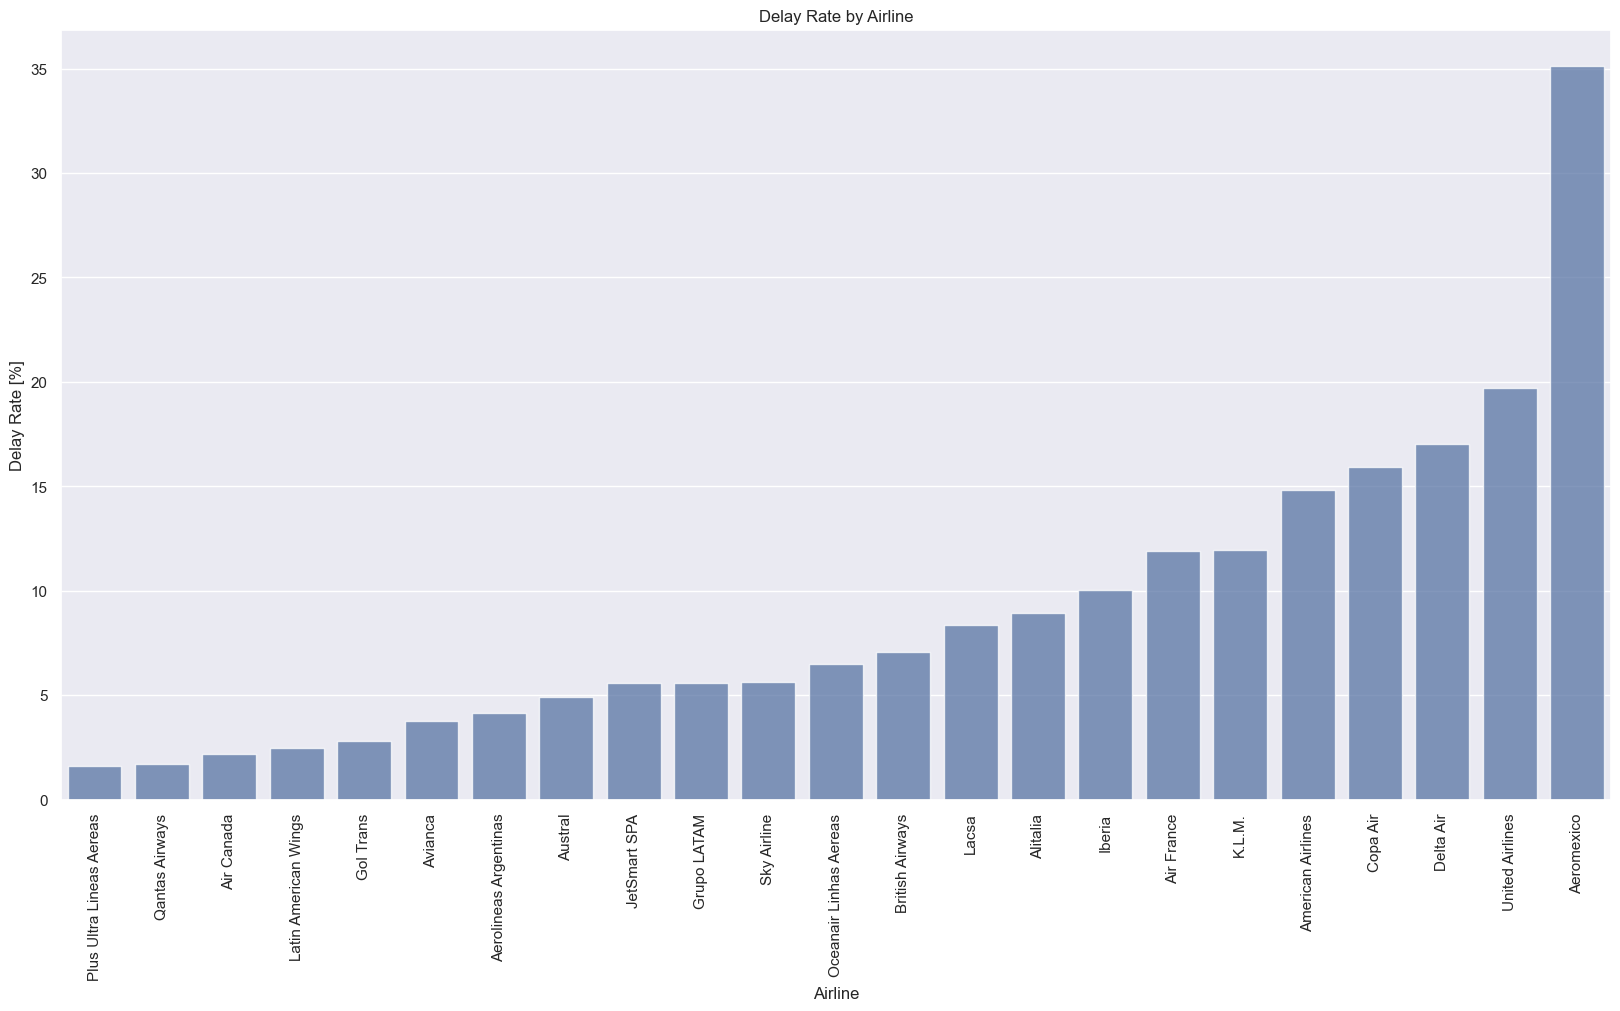

In [90]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate = airlines_rate.sort_values(by="Tasa (%)").reset_index()

plt.figure(figsize = (20,10))
sns.set(style="darkgrid")
sns.barplot(airlines_rate,x="index", y='Tasa (%)', alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

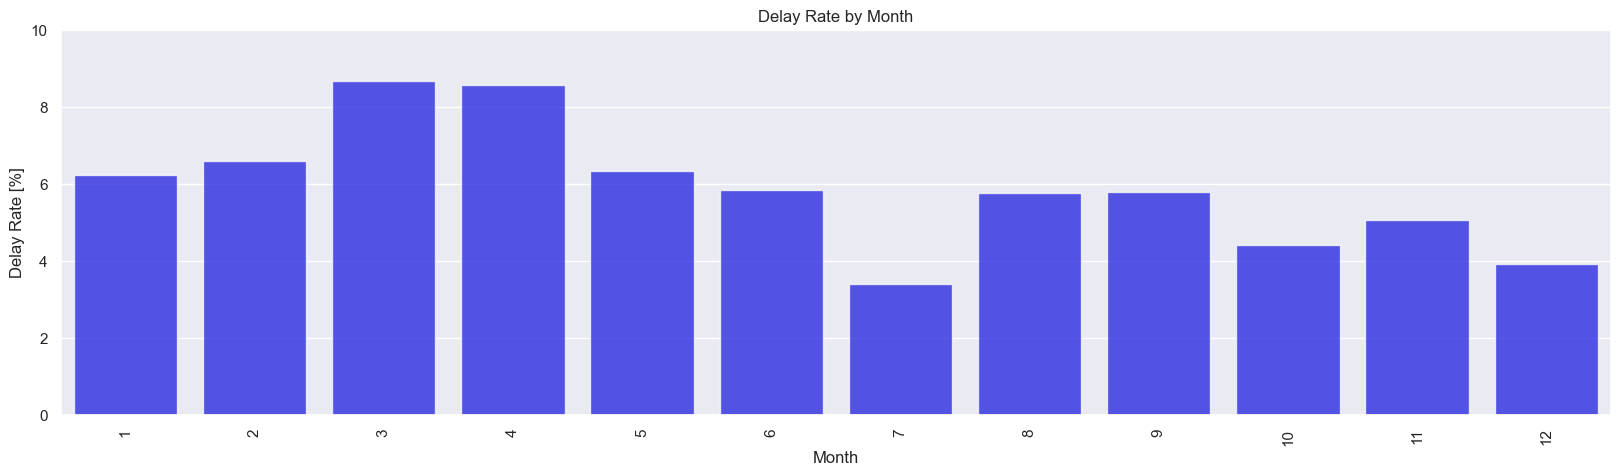

In [46]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = month_rate.reset_index()

plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(month_rate_value, x='index', y='Tasa (%)', color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

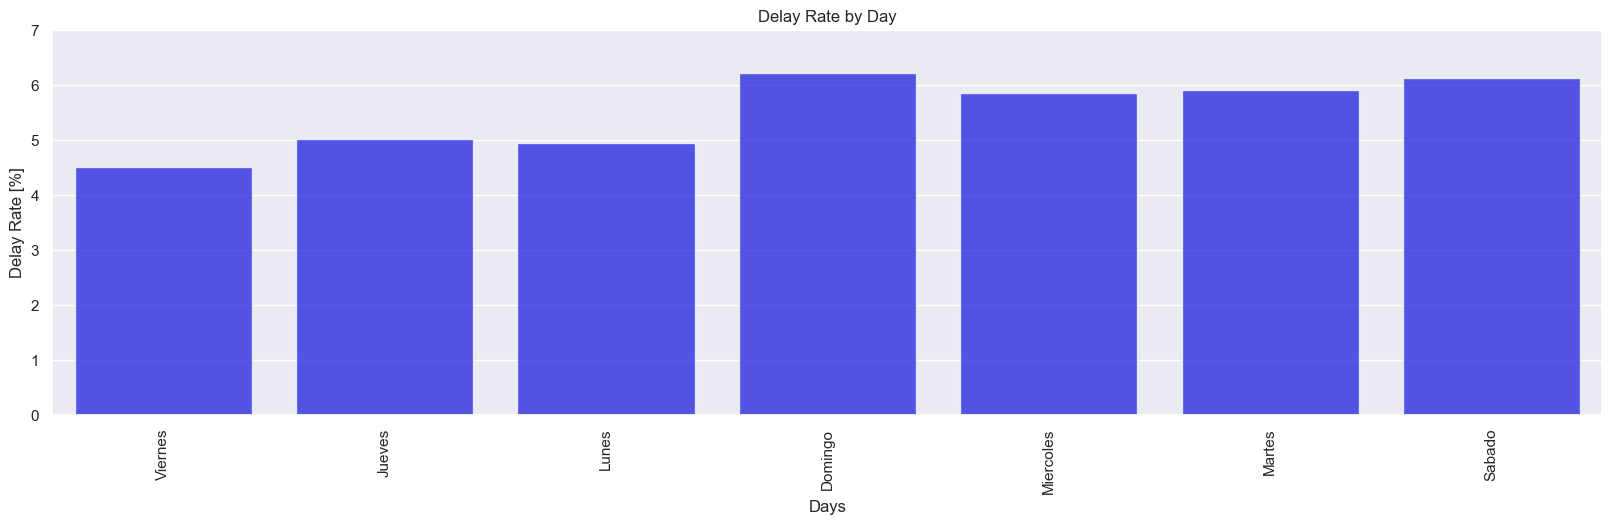

In [47]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = days_rate.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(days_rate_value, x='index', y='Tasa (%)', color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

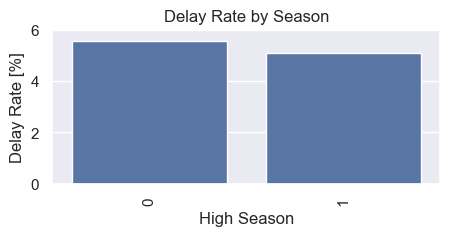

In [48]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = high_season_rate.reset_index()

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(high_season_rate_values,y='Tasa (%)', x='index')
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

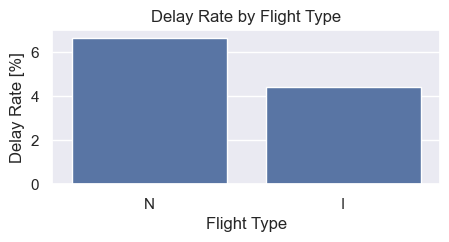

In [51]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = flight_type_rate.reset_index()
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(flight_type_rate_values,x='index', y='Tasa (%)')
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0,7)
plt.show()

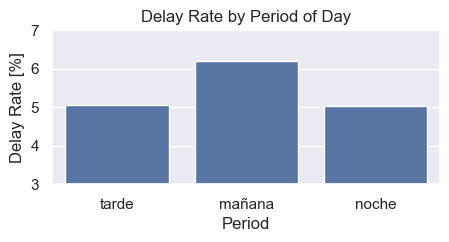

In [54]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = period_day_rate.reset_index()

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(period_day_rate_values, x='index', y='Tasa (%)')
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(3,7)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [222]:
training_data = shuffle(data[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'delay']], random_state = 111)

In [223]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['SIGLADES'], prefix = 'SIGLADES')], 
    axis = 1
)
target = data['delay']

In [155]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [156]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 85) | test shape: (22508, 85)


In [157]:
y_train.value_counts()

delay
0    37298
1     8400
Name: count, dtype: int64

In [158]:
y_test.value_counts()

delay
0    18294
1     4214
Name: count, dtype: int64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [110]:
import xgboost as xgb
from xgboost import plot_importance

In [159]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [160]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [161]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18294,     0],
       [ 4214,     0]], dtype=int64)

In [162]:
print(classification_report(y_test, xgboost_y_preds))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 4.b.ii. Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [163]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [164]:
reg_y_preds = reg_model.predict(x_test)

In [139]:
confusion_matrix(y_test, reg_y_preds)

array([[18259,    35],
       [ 4157,    57]], dtype=int64)

In [165]:
print(classification_report(y_test, reg_y_preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18294
           1       0.62      0.03      0.06      4214

    accuracy                           0.81     22508
   macro avg       0.72      0.51      0.48     22508
weighted avg       0.78      0.81      0.74     22508



#### 4.b.iii. Proposed Model: Desicion Tree

In [79]:
from sklearn import tree

In [166]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [167]:
tree_y_preds = tree_model.predict(x_test)

In [147]:
confusion_matrix(y_test, tree_y_preds)

array([[18259,    35],
       [ 4157,    57]], dtype=int64)

In [168]:
print(classification_report(y_test, tree_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18294
           1       0.63      0.04      0.08      4214

    accuracy                           0.82     22508
   macro avg       0.72      0.52      0.49     22508
weighted avg       0.78      0.82      0.74     22508



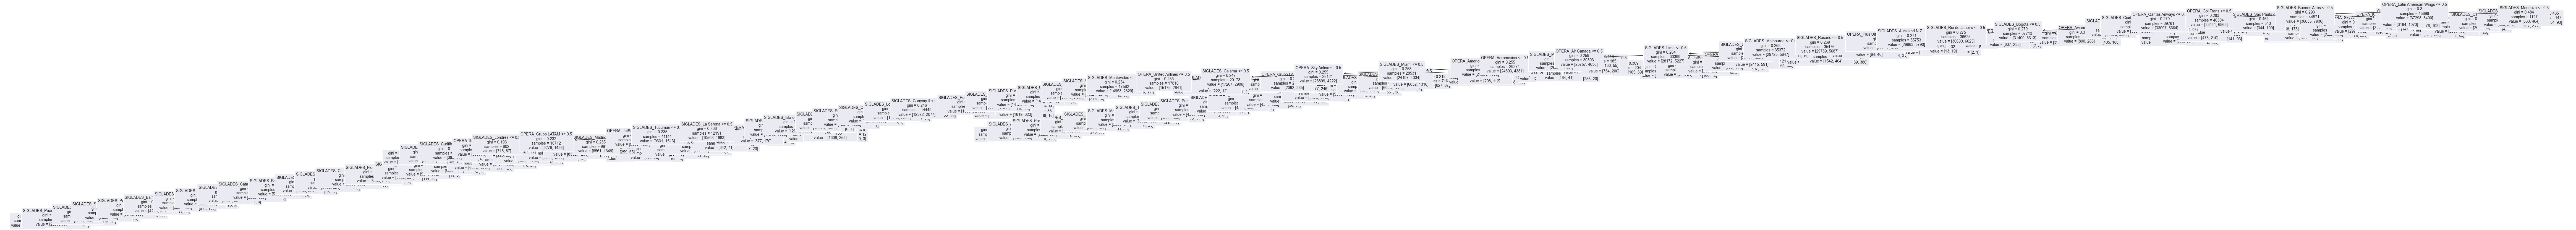

In [170]:
plt.figure(figsize=(120,10))
tree.plot_tree(tree_model, feature_names=x_train.columns, fontsize=10)
plt.show()

## 5. Data Analysis: Third Sight

### Feature Importance

Reviewing the trained models I decided to take a different approach selecting the Logistic Regression as the model 
to be used in a production environment.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1000x500 with 0 Axes>

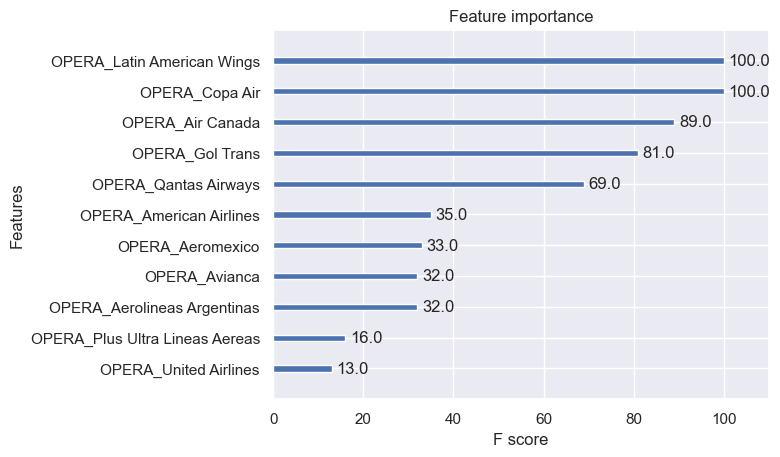

In [152]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model)

-------------------------------

Reviewing feature importance for the Logistic Regression model

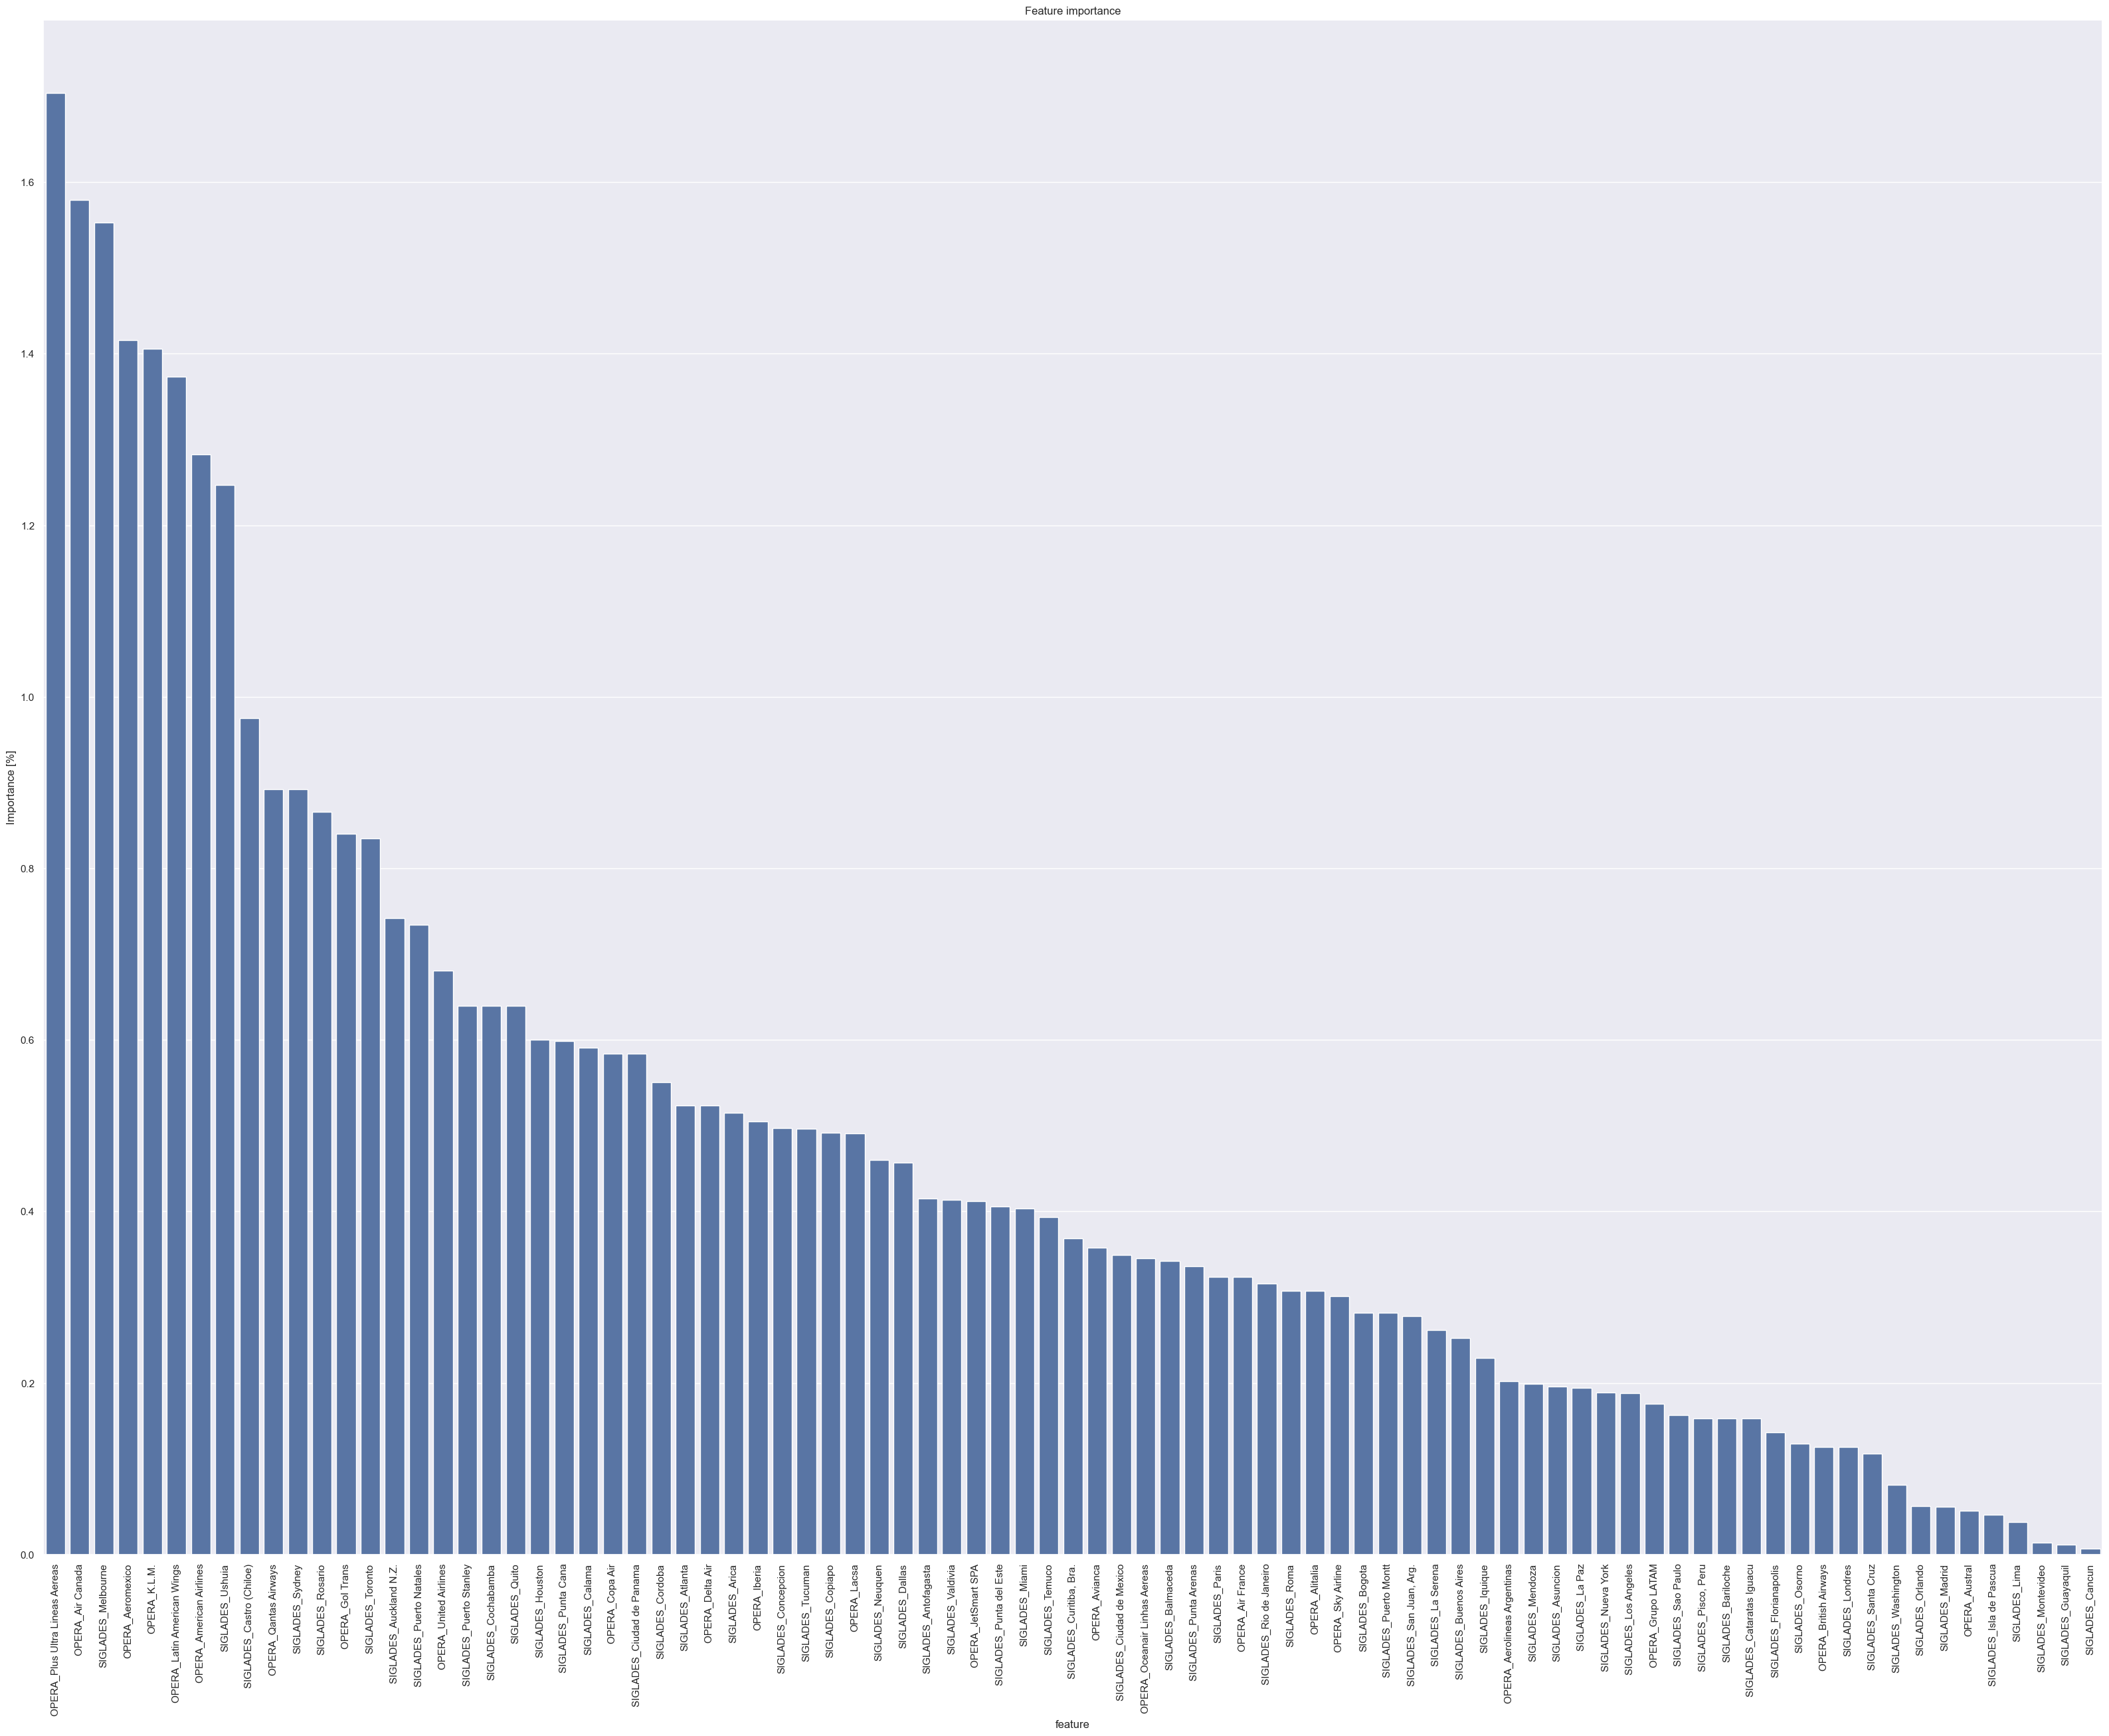

In [187]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(reg_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize = (40, 30))
sns.set(style="darkgrid")
sns.barplot(feature_importance, x='Feature', y='Importance')
plt.title('Feature importance')
plt.ylabel('Importance [%]', fontsize=12)
plt.xlabel('feature', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [194]:
top_10_features = feature_importance.iloc[:11,0].to_list()
top_10_features

['OPERA_Plus Ultra Lineas Aereas',
 'OPERA_Air Canada',
 'SIGLADES_Melbourne',
 'OPERA_Aeromexico',
 'OPERA_K.L.M.',
 'OPERA_Latin American Wings',
 'OPERA_American Airlines',
 'SIGLADES_Ushuia',
 'SIGLADES_Castro (Chiloe)',
 'OPERA_Qantas Airways',
 'SIGLADES_Sydney']

### Data Balance

In [214]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [225]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [196]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale)
xgb_model_2.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [197]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [198]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[17822,   472],
       [ 3835,   379]], dtype=int64)

In [199]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18294
           1       0.45      0.09      0.15      4214

    accuracy                           0.81     22508
   macro avg       0.63      0.53      0.52     22508
weighted avg       0.75      0.81      0.75     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [200]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [201]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [202]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18294,     0],
       [ 4214,     0]], dtype=int64)

In [203]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.00      0.00      0.00      4214

    accuracy                           0.81     22508
   macro avg       0.41      0.50      0.45     22508
weighted avg       0.66      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [204]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [205]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [206]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[17821,   473],
       [ 3834,   380]], dtype=int64)

In [207]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18294
           1       0.45      0.09      0.15      4214

    accuracy                           0.81     22508
   macro avg       0.63      0.53      0.52     22508
weighted avg       0.75      0.81      0.75     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [208]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [209]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [210]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18253,    41],
       [ 4152,    62]], dtype=int64)

In [211]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.60      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.71      0.51      0.46     22508
weighted avg       0.77      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

* _Using another model like the Decision Tree can be helpful to visualy identify the relation between the features and found the probability of a delayed flight based on some conditions_

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**

For this case the logistic regression can be more simple to include in an API, due to the simplicity of the model and the low req of it

In [215]:
import joblib

In [216]:
joblib.dump(reg_model_2, 'deplay_log_reg_model.pkl')

['deplay_log_reg_model.pkl']